In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-07-01 10:31:53--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-07-01 10:31:55--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc808f3e059e1101a93935ee5c9e.dl.dropboxusercontent.com/cd/0/inline/BoOQ__3pOYPlq_rJ2tWNam_PLDlTT1hd3FU9-S6B6gvyntTu_n5V7dAS4uLxazsjayFRWkp75s8MJbExZBAjgdIN-LGIFZuOoql_pBYR7yuYiWlgyhzou3l66x4cVJg7AjxW-vXBBDvspgP1g3sJ1cCwFakKMa7mpvl80yZBIIutRw/file# [following]
--2022-07-01 10:31:55--  https://uc808f3e059e1101a93935ee5c9e.dl.dropboxusercontent.com/cd/0/inline/BoOQ__3pOYPlq_rJ2tWNam_PLDlTT1hd3FU9-S6B6gvyntTu_n5V7dAS4uLxazs

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np #It provides a multidimensional array object, as well as variations such as masks and matrices which can be used for varoius math operation
import pandas as pd # allow us to use pandas functions
import matplotlib.pyplot as plt #Visualization library in Python for 2D plots of arrays

from keras.layers import Flatten, Dense #Flatten function converting resultant 2 dimensional array from pooled feature maps into single long continuous linear vector.Dense layer performs a matrix-vector multiplication,and the values used in the matrix are  parameters that can be trained and updated with the help of backpropagation.Dense layer is used for changing dimensions,rotation,scaling and translation of vector
from keras.models import Model #It allows us to create models layer by layer in sequential order
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img # generating images using Image Augmentation.Image Augmentation is a technique that is used to artifically expand the data set,useful on dataset with few data-samples.Image augmentation parameters are used to increase the data sample count are zoom,shear,rotation,preprocessing_function
from keras.applications.mobilenet import MobileNet, preprocess_input  # it's scaling the pixel values in the image and this function will return the preprocessed image data as a numpy array.It scale input pixels between -1 and 1
from keras.losses import categorical_crossentropy #Used as a loss function for multi-class classification model where there are two or more output labels.Output labels can be assigned encoding values as 0 and 1

#  Building our Model To train the data 

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False ) #created a base model by inputing shapes and include top.
                                                                      #input shape is what the shape of one sample look like.img_height,img_width,img_num_channel.
                                                                      #Include_top let's you select that if you want the final dense layer or not.
                                                                      #Include_top=False means the fully-connected output layers of the model used to make predictions is not loaded

for layer in base_model.layers:
  layer.trainable = False # it is used before compiling the model (copiling has loss function,optimizers and matric).
                          #It will move all the weights from trainable to non trainable. non trainable mean freezing the layer means won't be updated during training.


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, #zoom in and zoom out
     shear_range = 0.2, # specifies the angle of the slant(a direction) in degrees
     horizontal_flip=True, #flips both rows and columns horizontally
     rescale = 1./255 #rescales input values to a new range and to convert perticular image into pixels in given range
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",  #Takes the path to a directory and generates batches
                                               target_size=(224,224), #size of input images
                                               batch_size=32, #number of batches
                                  )


train_data.class_indices #define the classes or expretions

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

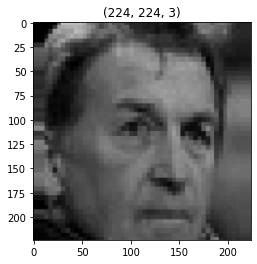

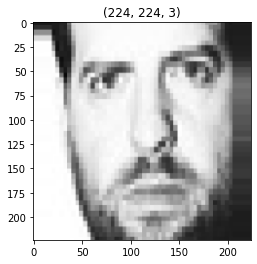

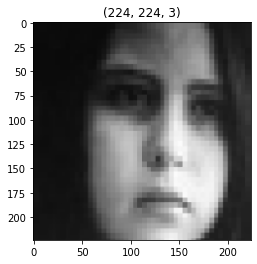

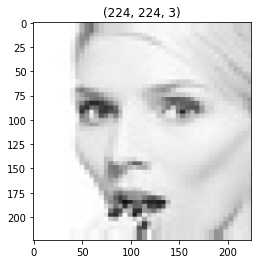

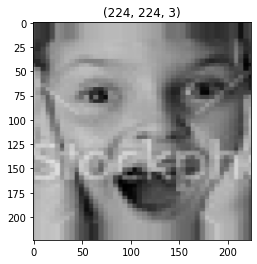

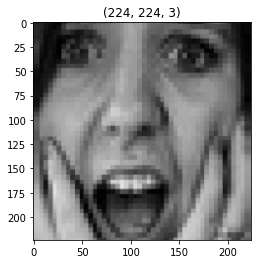

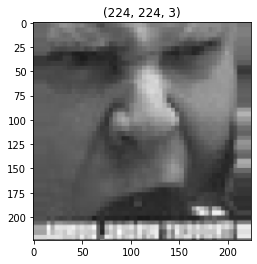

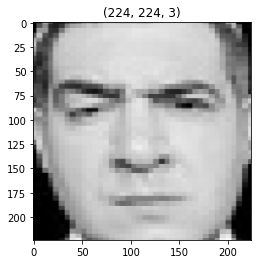

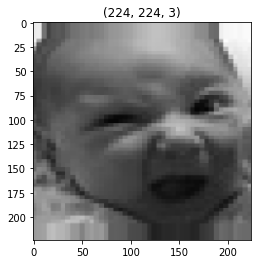

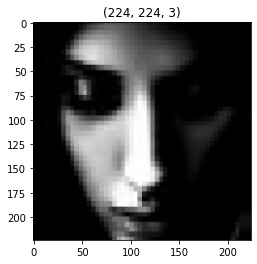

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False #it will not show x and y axis
    plt.show()
    
    count += 1   #incrementing the current value by 1
    if count == 10:  
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping # used for stop the model training in between

# early stopping                            # minimum changes             # the choice that how to see the output of Nural Network while it is training. 
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto') 
                                                            #the number of epochs without improvement 
# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
                      #location of the file                                         #the best model will be save in model
# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, # brings the new data in model
                           validation_steps= 8, #training steps on given data
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 22.1546 - accuracy: 0.1937
Epoch 1: val_accuracy improved from -inf to 0.19922, saving model to best_model.h5
10/10 [==============================] - 17s 420ms/step - loss: 22.1546 - accuracy: 0.1937 - val_loss: 16.6383 - val_accuracy: 0.1992
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 12.5251 - accuracy: 0.3156
Epoch 2: val_accuracy improved from 0.19922 to 0.32031, saving model to best_model.h5
10/10 [==============================] - 4s 395ms/step - loss: 12.5251 - accuracy: 0.3156 - val_loss: 13.3744 - val_accuracy: 0.3203
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.9632 - accuracy: 0.3688
Epoch 3: val_accuracy improved from 0.32031 to 0.44922, saving model to best_model.h5
10/10 [==============================] - 4s 399ms/step - loss: 7.9632 - accuracy: 0.3688 - val_loss: 6.1709 - val_accuracy: 0.4492
Epoch 4/30
10/10 [==============================] - ETA: 0s - l

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

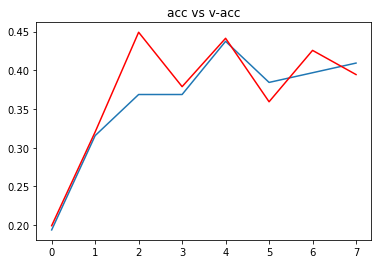

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

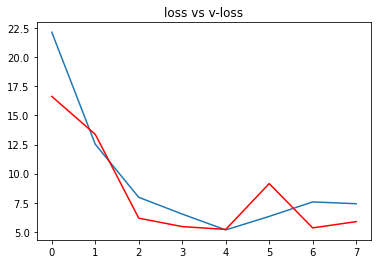

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of fear


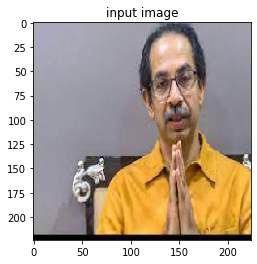

In [ ]:
# path for the image to see if it predics correct class

path = "/download2qq.jpg"       #change the path
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape
          #arguments which gives the maximum values
pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()